In [41]:
import pandas as pd
 
# read by default 1st sheet of an excel file
df = pd.read_excel('C:\\Users\\ashna\\Downloads\\Financial Sample.xlsx')
 
print(df.head())

      Segment  Country    Product Discount Band  Units Sold  \
0  Government   Canada  Carretera          None      1618.5   
1  Government  Germany  Carretera          None      1321.0   
2   Midmarket   France  Carretera          None      2178.0   
3   Midmarket  Germany  Carretera          None       888.0   
4   Midmarket   Mexico  Carretera          None      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                    3          20      32370.0        0.0  32370.0  16185.0   
1                    3          20      26420.0        0.0  26420.0  13210.0   
2                    3          15      32670.0        0.0  32670.0  21780.0   
3                    3          15      13320.0        0.0  13320.0   8880.0   
4                    3          15      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month Number Month Name  Year  
0  16185.0 2014-01-01             1    January  2014  
1  13210.0 2014-01-01         

NON PERTURBATIVE METHODS

global recoding

In [28]:
df['Discount Band'].replace('None', 'No Discount', inplace=True)

In [29]:
print(df['Segment'].unique())
print(df['Country'].unique())

['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']
['Canada' 'Germany' 'France' 'Mexico' 'United States of America']


In [30]:
# recode values using replace() method
df['Country'] = df['Country'].replace({'Canada': 'u', 'Germany': 'v', 'France': 'w', 'Mexico': 'x', 'United States of America': 'y'})

print(df.head())

      Segment Country    Product Discount Band  Units Sold  \
0  Government       u  Carretera   No Discount      1618.5   
1  Government       v  Carretera   No Discount      1321.0   
2   Midmarket       w  Carretera   No Discount      2178.0   
3   Midmarket       v  Carretera   No Discount       888.0   
4   Midmarket       x  Carretera   No Discount      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                    3          20      32370.0        0.0  32370.0  16185.0   
1                    3          20      26420.0        0.0  26420.0  13210.0   
2                    3          15      32670.0        0.0  32670.0  21780.0   
3                    3          15      13320.0        0.0  13320.0   8880.0   
4                    3          15      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month Number Month Name  Year  
0  16185.0 2014-01-01             1    January  2014  
1  13210.0 2014-01-01             1 

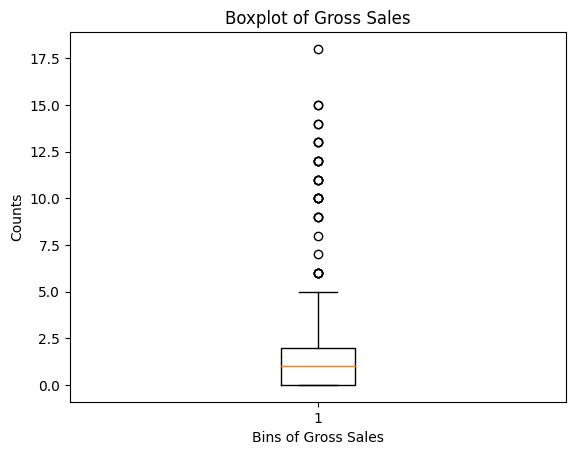

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# create bins of size 1000
bins = range(0, 200000, 1000)

# count the number of values in each bin
value_counts = pd.cut(df['Gross Sales'], bins).value_counts()

# convert value_counts to a pandas Series
value_counts_series = pd.Series(value_counts.values, index=value_counts.index)

# create a boxplot
fig, ax = plt.subplots()
ax.boxplot(value_counts_series)
ax.set_title('Boxplot of Gross Sales')
ax.set_xlabel('Bins of Gross Sales')
ax.set_ylabel('Counts')
plt.show()

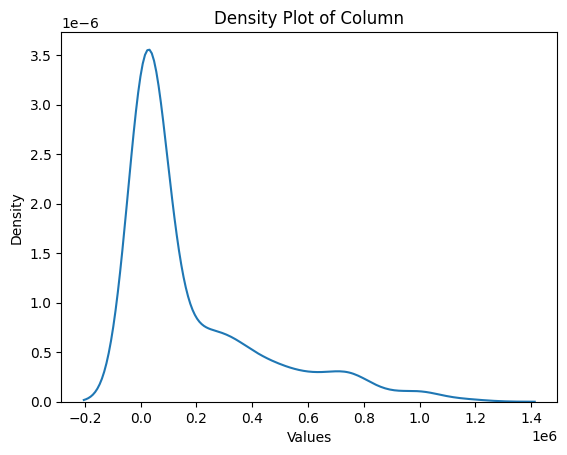

In [32]:
col = df['Gross Sales']

import matplotlib.pyplot as plt
import seaborn as sns

# plot density plot
sns.kdeplot(col)
plt.title('Density Plot of Column')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [48]:
percentiles = [0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.98, 0.99]
s_percentiles = df['Gross Sales'].describe(percentiles=percentiles)

# print the results
print("Gross Sales Percentiles:")
for percentile, value in zip(percentiles, s_percentiles):
    print(f"{percentile*100:.0f}th Percentile: {value:,.0f}")

Gross Sales Percentiles:
10th Percentile: 700
20th Percentile: 182,759
25th Percentile: 254,262
50th Percentile: 1,799
75th Percentile: 8,330
80th Percentile: 13,688
90th Percentile: 17,392
95th Percentile: 37,980
97th Percentile: 279,025
98th Percentile: 349,625
99th Percentile: 600,645


In [44]:
# define the cutoffs for high, low, and medium values
high_cutoff = 45000
low_cutoff = 15000
medium_cutoff = 30000

# convert 'Gross Sales' column to numeric data type
df['Gross Sales'] = pd.to_numeric(df['Gross Sales'], errors='coerce')

# create a new column 'category' based on the cutoffs
df['category'] = pd.cut(df['Gross Sales'], bins=[-float('inf'), low_cutoff, medium_cutoff, high_cutoff, float('inf')], labels=['low', 'medium', 'high', 'very high'])

# print the dataframe
print(df['category'].head())

0      high
1    medium
2      high
3       low
4      high
Name: category, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']


Top and Botton coding

In [34]:
# convert 'Gross Sales' column to numeric datatype
df['Gross Sales'] = pd.to_numeric(df['Gross Sales'], errors='coerce')

# identify outliers above 61111
outliers = df[df['Gross Sales'] > 61111]

# replace outliers with generic value
df.loc[df['Gross Sales'] > 61111, 'Gross Sales'] = 'Unknownn'

print(df['Gross Sales'])

0       32370.0
1       26420.0
2       32670.0
3       13320.0
4       37050.0
         ...   
695    Unknownn
696    Unknownn
697      9576.0
698      5061.0
699     21672.0
Name: Gross Sales, Length: 700, dtype: object
